<pre>
<font color='red'>
                                             Digit Recognizer Competition
</font>
</pre>

<pre>   

                                                                        <span style='color:blue'> Author: </span> NACHOUR Ilham 
                                                                        
</pre>

**The goal in this competition is to take an image of a handwritten single digit, and determine what that digit is. So let's get started**

## Importing the Libraries

In [1]:
#import required packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV,train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn import metrics


## Loading test and training data

In [2]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

First look to our data

In [3]:
print('----------------------------------------------------train data --------------------------------------------------------------')
display(train_data.head())
print('----------------------------------------------------test data ---------------------------------------------------------------')
display(test_data.head())

----------------------------------------------------train data --------------------------------------------------------------


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


----------------------------------------------------test data ---------------------------------------------------------------


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Exploration

In [4]:
#check out the size of the data
print('Train data shape:',train_data.shape)
print('Test data shape:',test_data.shape)

Train data shape: (42000, 785)
Test data shape: (28000, 784)


The training-set has 42000 rows and 785 features,while test-set has 28000 rows and only 784 features,this is due to,the fact that the test data doesn't include the target column Label.

In [5]:
print('-------------------------------information about our training data-------------------------------------------------')
print(train_data.info())
print()
print('-------------------------------information about our test data------------------------------------------------------')
print(test_data.info())

-------------------------------information about our training data-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None

-------------------------------information about our test data------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None


From the result above,all columns are numericals.let's check if there are some missing values in our training and test data

In [6]:
print('The sum of missing values in training data :',sum(train_data.isnull().sum()))
print('The sum of missing values in test data :',sum(test_data.isnull().sum()))

The sum of missing values in training data : 0
The sum of missing values in test data : 0


As we see here,there aren't missing values in both of the data.Now,check if there are some duplicated rows

In [7]:
#check if there are duplicated values in data train and data test
print('Number of duplicate rows in train data :',train_data.duplicated().sum())
print('Number of duplicate rows in test data:',test_data.duplicated().sum())

Number of duplicate rows in train data : 0
Number of duplicate rows in test data: 0


the same as the missing values,duplicated rows don't exist.So let move on to split our data and build our model

## Data Modeling

First of all, it's necessary to transfrorm X and y en numpy.ndarray

In [8]:
#Transformating X and Y en numpy.ndarray
X = train_data.drop('label',axis=1).values
y = train_data['label'].values
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

Then,let's make some plot to visualize our data:

4


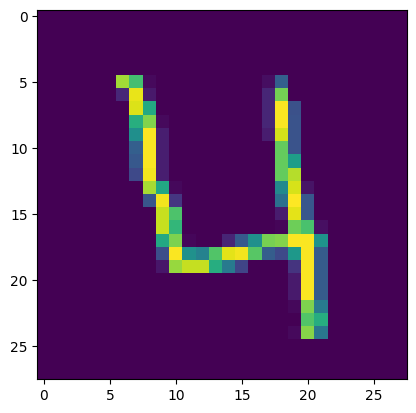

In [9]:
row = X[3]
row_reshape = row.reshape((28, 28))
row_image = plt.imshow(row_reshape)


print(y[3])

7


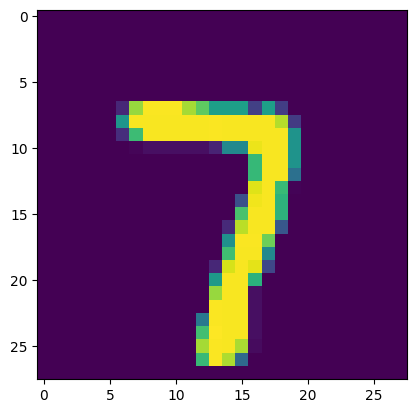

In [10]:
row = X[7635]
row_reshape = row.reshape((28, 28))
row_image = plt.imshow(row_reshape)


print(y[7635])

Before fitting our KNN model ,we can use the sklearn GridSearchCV to perform a grid search to select the best hyperparams, using cross-validation.In this case, we will vary the number of neighbors:

In [11]:
#Only odd numbers, to prevent ties
param_grid = {"n_neighbors": range(1, 18, 2)}
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
gscv = GridSearchCV(knn,
                    param_grid,
                    cv=5,
                    verbose=3)
gscv.fit(X, y)


print("Best params:", gscv.best_params_)
print("Best cross-validation score:", gscv.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.966 total time=  13.1s
[CV 2/5] END .....................n_neighbors=1;, score=0.968 total time=  12.8s
[CV 3/5] END .....................n_neighbors=1;, score=0.963 total time=  12.4s
[CV 4/5] END .....................n_neighbors=1;, score=0.967 total time=  12.5s
[CV 5/5] END .....................n_neighbors=1;, score=0.967 total time=  13.7s
[CV 1/5] END .....................n_neighbors=3;, score=0.970 total time=  14.5s
[CV 2/5] END .....................n_neighbors=3;, score=0.967 total time=  12.9s
[CV 3/5] END .....................n_neighbors=3;, score=0.963 total time=  13.0s
[CV 4/5] END .....................n_neighbors=3;, score=0.964 total time=  12.3s
[CV 5/5] END .....................n_neighbors=3;, score=0.969 total time=  12.6s
[CV 1/5] END .....................n_neighbors=5;, score=0.968 total time=  14.4s
[CV 2/5] END .....................n_neighbors=5;,

We have obtained the greatest mean accuracy using 3 neighbors. The following figure shows the score depending on the number of neighbors

(0.9, 1.0)

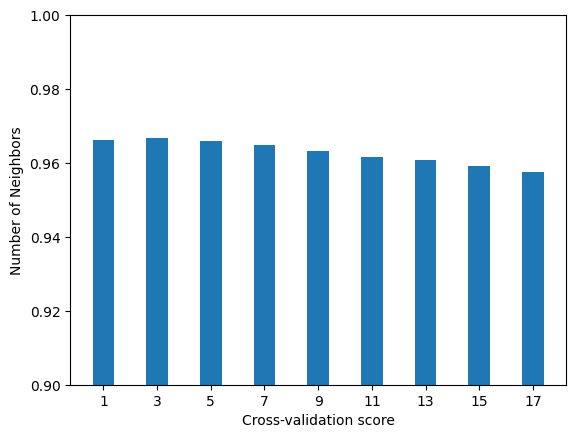

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.bar(param_grid["n_neighbors"], gscv.cv_results_["mean_test_score"])
ax.set_xticks(param_grid["n_neighbors"])
ax.set_ylabel("Number of Neighbors")
ax.set_xlabel("Cross-validation score")
ax.set_ylim((0.9, 1))

In [13]:
#split the training data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

## Model Fitting

For this problem, we choose to work with KNN as the baseline model, and SVC (SVM) as a comparatif model

In [14]:
#KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)
y_pred_knn=knn_model.predict(X_test)

In [15]:
#SVC
svc = SVC(kernel='poly', degree=2)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

## Model Evaluation

Let's now evaluate our models

In [16]:
print('---------------------------------------------KNN---------------------------------------------')
print('accuracy:',metrics.accuracy_score(y_test,y_pred_knn))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_knn))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_knn))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))

---------------------------------------------KNN---------------------------------------------
accuracy: 0.9697619047619047
Mean Absolute Error: 0.11714285714285715
Mean Squared Error: 0.5742857142857143
Root Mean Squared Error: 0.7578164119928482


In [17]:
print('---------------------------------------------SVC---------------------------------------------')
print('accuracy:',metrics.accuracy_score(y_test,y_pred_svc))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_svc))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_svc))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_svc)))

---------------------------------------------SVC---------------------------------------------
accuracy: 0.9727380952380953
Mean Absolute Error: 0.1025
Mean Squared Error: 0.511547619047619
Root Mean Squared Error: 0.7152255721432358


We can observe that KNN and SVC are closed, but:
   
  -  SVC has the best value of MAE: 
  -  SVC has the best value of accuracy,
  -  SVC has the best value of MSE,
  -  SVC has the best value of RMSE,
 
Based on model evaluatuin, we  consider the *SVC* model as the most efficient model.So,we gonna use the SVC model to predict the new data : test_data

In [18]:
# save submission to csv

pd.DataFrame({"ImageId": list(range(1,len(svc.predict(test_data))+1)),
              "Label": svc.predict(test_data)}).to_csv('Digit_Recogniser.csv', index=False,header=True)

C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
